California Housing Price Prediction .
Project 1 

DESCRIPTION

Background of Problem Statement :

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

Domain: Finance and Housing

Analysis Tasks to be performed:

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.

1. Load the data :

Read the “housing.csv” file from the folder into the program.
Print first few rows of this data.
Extract input (X) and output (Y) data from the dataset.
2. Handle missing values :

Fill the missing values with the mean of the respective column.
3. Encode categorical data :

Convert categorical column in the dataset to numerical data.
4. Split the dataset : 

Split the data into 80% training dataset and 20% test dataset.
5. Standardize data :

Standardize training and test datasets.
6. Perform Linear Regression : 

Perform Linear Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error (RMSE) from Linear Regression.
            [ HINT: Import mean_squared_error from sklearn.metrics ]

7. Bonus exercise: Perform Linear Regression with one independent variable :

Extract just the median_income column from the independent variables (from X_train and X_test).
Perform Linear Regression to predict housing values based on median_income.
Predict output for test dataset using the fitted model.
Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

Dataset Description :

Field	Description
1. longitude	(signed numeric - float) : Longitude value for the block in California, USA
2. latitude	(numeric - float ) : Latitude value for the block in California, USA
3. housing_median_age	(numeric - int ) : Median age of the house in the block
4. total_rooms	(numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
5. total_bedrooms	(numeric - float ) : Count of the total number of bedrooms in all houses in the block
6. population	(numeric - int ) : Count of the total number of population in the block
7. households	(numeric - int ) : Count of the total number of households in the block
8. median_income	(numeric - float ) : Median of the total household income of all the houses in the block
9. ocean_proximity	(numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]
10. median_house_value	(numeric - int ) : Median of the household prices of all the houses in the block
 

Dataset Size : 20640 rows x 10 columns

In [43]:
#import the necessary libraries required 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#%matplotlib notebook
%matplotlib inline

# Input data files are available in the "../project/" directory.

import os
print(os.listdir("../project"))

['1553768847_housing.xlsx', '.ipynb_checkpoints', 'California Housing Price Prediction.ipynb']


### Loading Housing Dataset and Exploratory Data Analysis

In [89]:
# Import housing excel dataset

df = pd.read_excel(os.path.join(pathlib.Path('.').parent.resolve(),'1553768847_housing.xlsx'),engine='openpyxl')

In [110]:
print(f"Number of rows and colums and also called shape of the matrix: {df.shape}")
print(f"Columns are \n {df.columns}")

Number of rows and colums and also called shape of the matrix: (20640, 10)
Columns are 
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')


In [111]:
# Data Set info to understand the columns, dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  int8   
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), int8(1)
memory usage: 1.4 MB


In [92]:
# Describe to basic statistics of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [93]:
# Showing first five rows in raw dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


<Figure size 432x288 with 0 Axes>

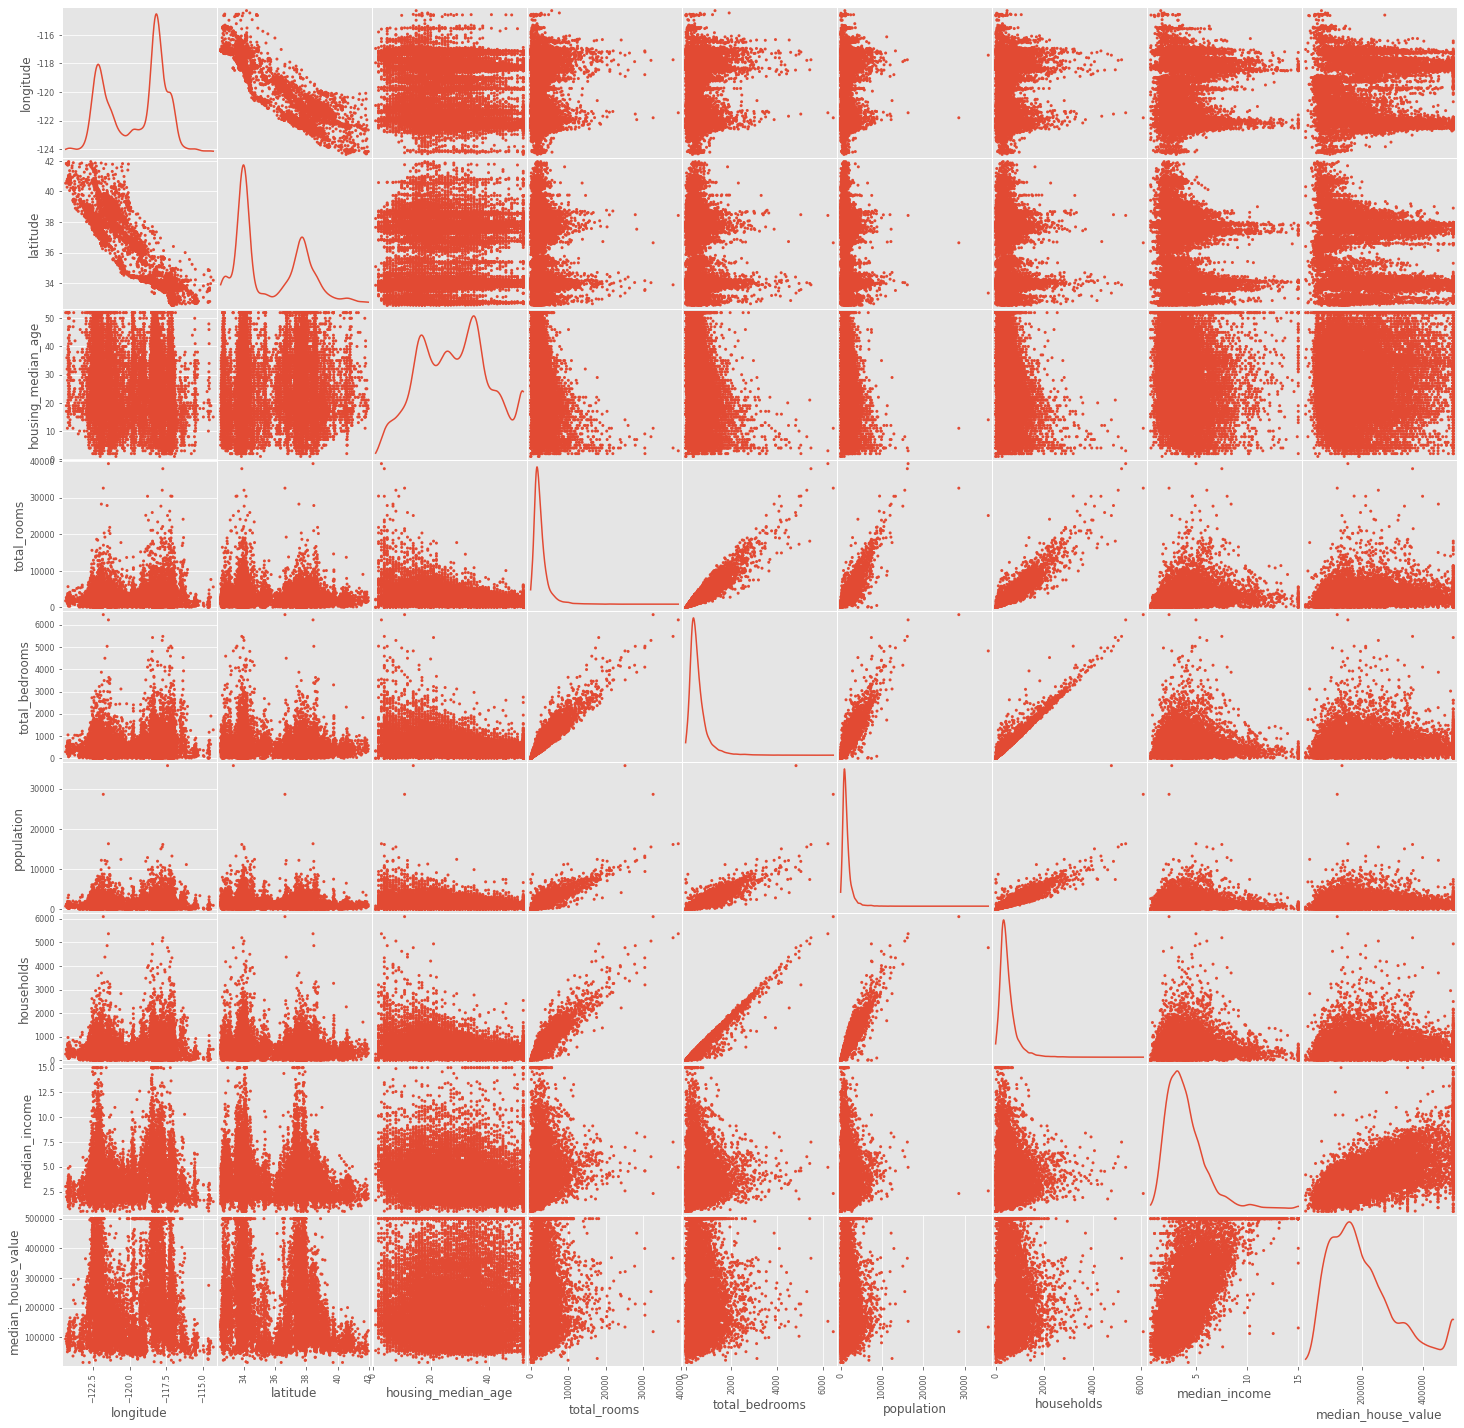

In [94]:
#Display of each column distribution in Scatter Matrix
plt.style.use('ggplot')
fig = plt.figure()
scatter_matrix(df,figsize =(25,25),alpha=1.0,diagonal="kde",marker=".");

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f794b4d8220>,
      dtype=object)

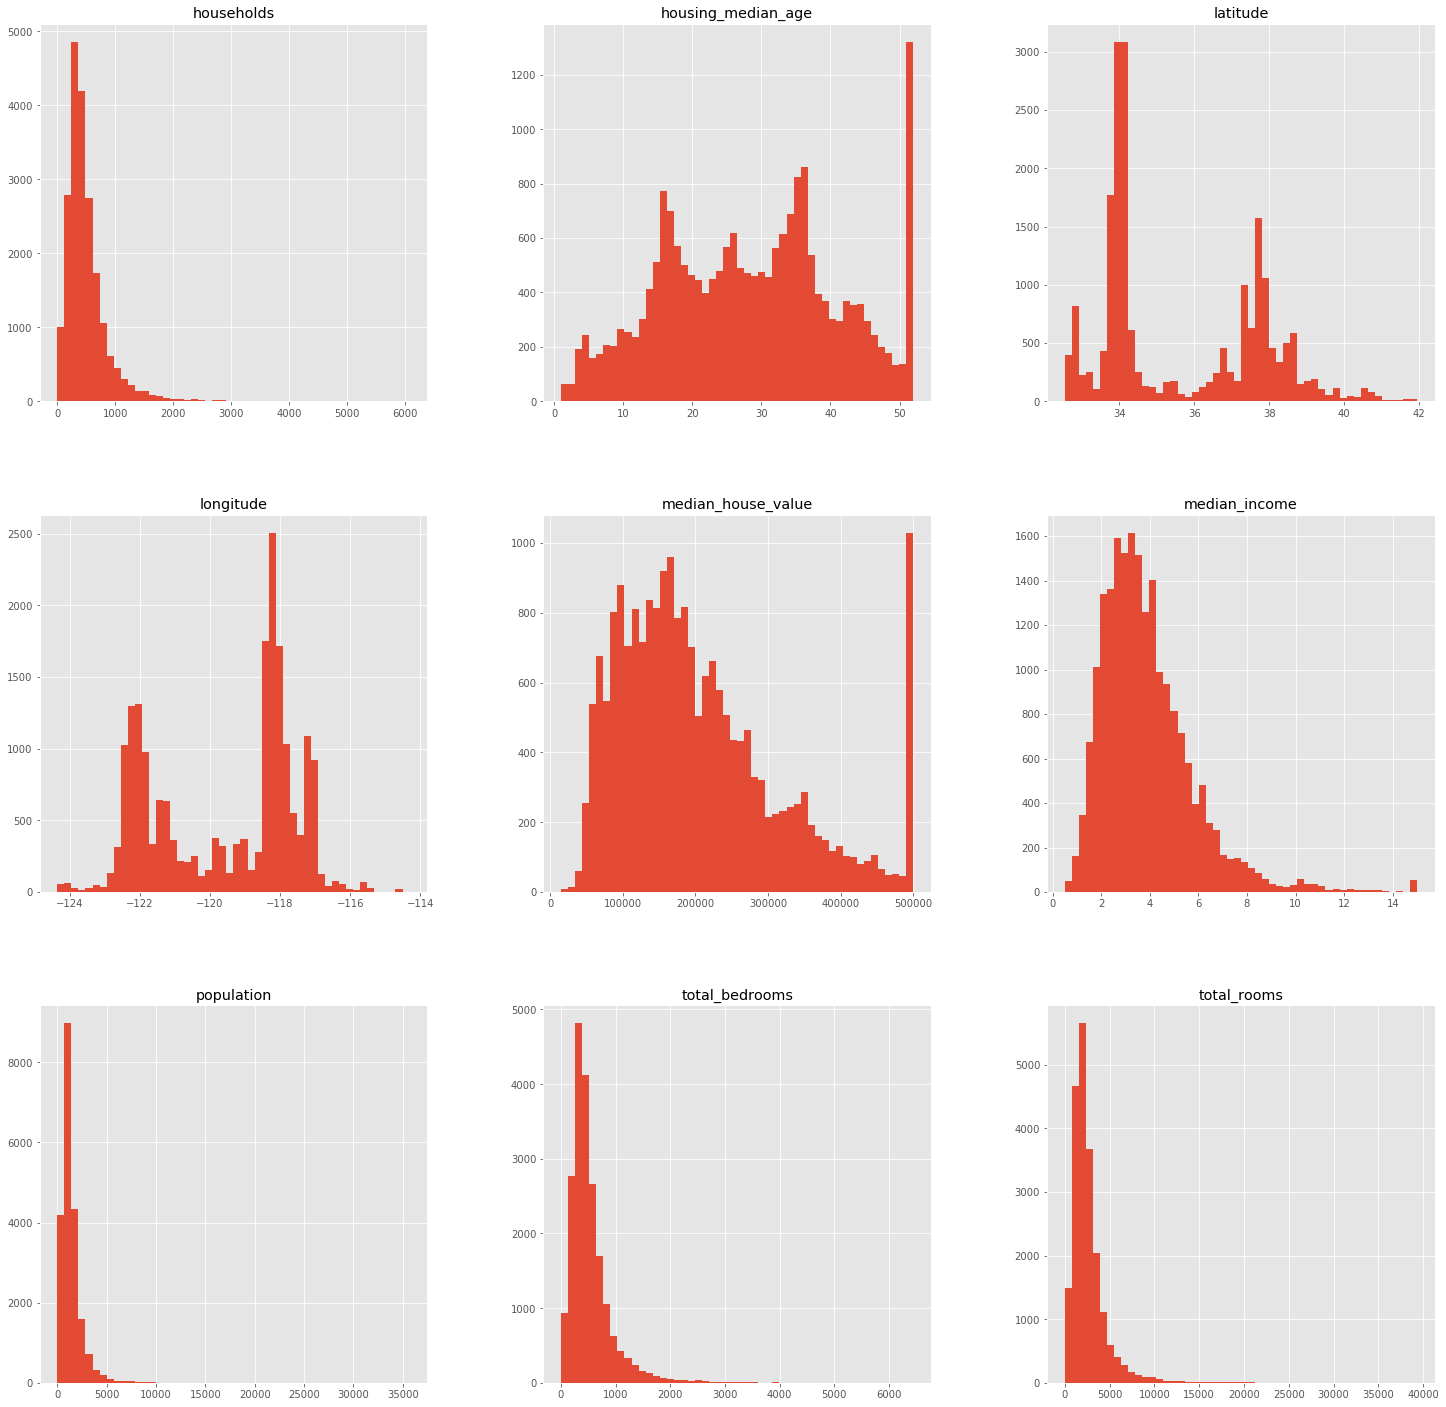

In [95]:
# Column level Histogram
df.hist(figsize=(25,25),bins=50)

In [97]:
# Finding Correlation using corr function to see which features has impact on the target variable
corr = df.corr()
corr.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


### Handling Missing Values in Dataset

In [98]:
# Filling total_bedrooms column nan values with mean value of that column
df['total_bedrooms'].fillna(np.mean(df['total_bedrooms']),inplace=True)

In [99]:
# Data Set info to understand the columns, dtypes after filling NAN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


### Encoding Categorical Data which ocean_proximity column

In [100]:
# Converting category data into numerical data
df['ocean_proximity'] = df['ocean_proximity'].astype('category')
df['ocean_proximity'] = df['ocean_proximity'].cat.codes
df['ocean_proximity'].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [101]:
# Displaying first 5 records after encoding categorical data and filled missing values
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


### Split the data into 80% training dataset and 20% test dataset.

In [102]:
# Extracting X input and Y target to train model

X_data = df.drop('median_house_value', axis=1)
Y_target = df['median_house_value']

In [103]:
# Display of first 5 rows in X input
X_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3


In [104]:
# Display of first 5 rows in Y target
Y_target.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [105]:
# Splitting X and Y to train (80%) and test (20%)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_data,Y_target,random_state=1,test_size=0.20)
print("x_train shape {} and size {}".format(x_train.shape,x_train.size))
print("x_test shape {} and size {}".format(x_test.shape,x_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

x_train shape (16512, 9) and size 148608
x_test shape (4128, 9) and size 37152
y_train shape (16512,) and size 16512
y_test shape (4128,) and size 4128


### Standardize training and test datasets.

In [106]:
# Using StandardScaler to standardize dataset to have zero mean and one Standard Deviation
from sklearn.preprocessing import StandardScaler
# the scaler object (model)
scaler = StandardScaler()# fit and transform the data
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test) 

print("train data")
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

train data
[[-1.42250942  0.97229046  1.85890297 -0.56497684 -0.60419991 -0.4861138
  -0.57159385 -0.36232605  1.28811826]
 [-1.38265919  1.08459626  1.06434823 -0.53051556 -0.59464877 -0.40424308
  -0.51668155 -0.14102329  1.28811826]
 [-0.8297373   1.06119922 -1.0014941  -1.18987464 -1.26322834 -1.25053723
  -1.29329827 -0.66144956 -0.1168232 ]
 [ 0.60985212 -0.75441118  0.42870444  1.18473701  2.47604167  1.8801282
   2.27600079 -1.24864731 -0.81929393]
 [ 0.58992701 -0.81524349  0.74652633 -0.36234454 -0.49436183 -0.6009108
  -0.48791797  1.82892019 -0.81929393]]
test data
[[ 0.60487084 -0.73569355  0.82598181  0.07830031  0.31270922 -0.28143698
   0.32269207 -0.33102858 -0.81929393]
 [-0.10247067  0.53710549  0.66707086 -0.20887699 -0.20066438 -0.25118041
  -0.16367395 -1.0032899  -0.1168232 ]
 [-1.41752814  0.98164928  1.38217013 -0.37704801 -0.30572688  0.09677018
  -0.24734983  0.0724551   1.28811826]
 [-1.34779025  1.01908454  1.85890297 -1.05662437 -1.05549111 -1.09035537
  -

### Perform Linear Regression

### Median House Values are continuous so its a regression problem

In [112]:
# Intantiate LinearRegression model from sklearn and training the model with X_train (80%) of input dataset.
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(n_jobs=-1)

#fit the model to the training data
linreg.fit(X_train,y_train)


#print the intercept and coefficients 
print(f"Intercept is {linreg.intercept_}")
print(f"coefficients  is {linreg.coef_}")

Intercept is 207735.0641957363
coefficients  is [-85719.62419285 -90753.20159388  14624.24311588 -15959.37414613
  37190.05030209 -43836.23163718  27376.37429372  76258.38625495
    609.71258031]


In [113]:
# Predicting the median house values using X_test
y_pred = linreg.predict(X_test)

In [114]:
print(f"Length of y_pred: {len(y_pred)}")
print(f"Length of y_test: {len(y_test)}")
print(f"First 5 y_pred values: {y_pred[0:5]}")
print(f"First 5 y_test values: {y_test.values[0:5]}")

Length of y_pred: 4128
Length of y_test: 4128
First 5 y_pred values: [240539.75113574 103350.50878396 250314.98225315 159593.5973523
 283133.22208693]
First 5 y_test values: [355000  70700 229400 112500 225400]


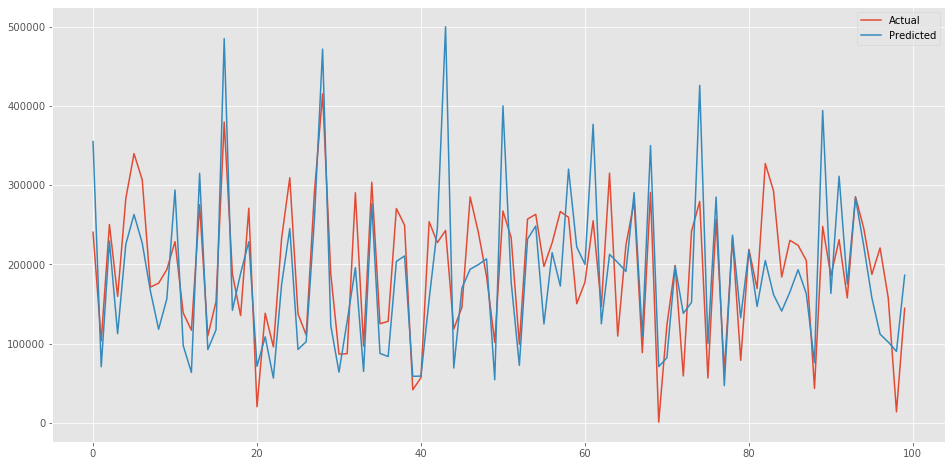

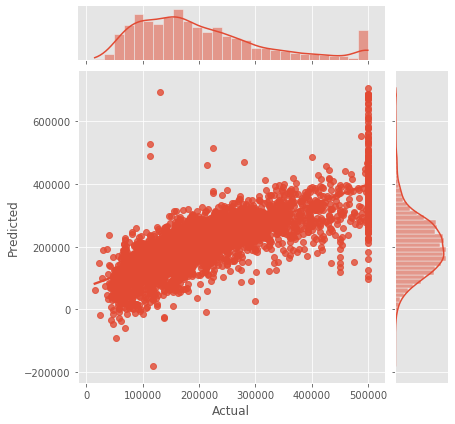

In [115]:
# Displaying the Actual and Prediction charts

test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

### Print root mean squared error (RMSE) from Linear Regression.

In [118]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

69888.79391558649


## Bonus exercise: Perform Linear Regression with one independent variable

1. Extract just the median_income column from the independent variables (from X_train and X_test). 

2. Perform Linear Regression to predict housing values based on median_income. 

3. Predict output for test dataset using the fitted model. 
4. Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data

In [122]:
# Extracting median_income independent variable which high impact(68.8%) on target variable
X_ind = df['median_income']
# Display of first 5 rows in X input
X_ind.head()

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: median_income, dtype: float64

In [136]:
# Splitting X and Y to train (80%) and test (20%)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_ind,Y_target,random_state=42,test_size=0.20)
print("x_train shape {} and size {}".format(x_train.shape,x_train.size))
print("x_test shape {} and size {}".format(x_test.shape,x_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

x_train shape (16512,) and size 16512
x_test shape (4128,) and size 4128
y_train shape (16512,) and size 16512
y_test shape (4128,) and size 4128


In [148]:
# Intantiate LinearRegression model from sklearn and training the model with X_train (80%) of input dataset.

linreg = LinearRegression()


#fit the model to the training data
# Reshaping due to single column
linreg.fit(np.array(x_train).reshape(-1,1),y_train)


#print the intercept and coefficients 
print(f"Intercept is {linreg.intercept_}")
print(f"coefficients  is {linreg.coef_}")

Intercept is 44459.72916907875
coefficients  is [41933.84939381]


In [150]:
# Predicting the median house values using X_test
y_pred = linreg.predict(np.array(x_test).reshape(-1,1))

In [151]:
print(f"Length of y_pred: {len(y_pred)}")
print(f"Length of y_test: {len(y_test)}")
print(f"First 5 y_pred values: {y_pred[0:5]}")
print(f"First 5 y_test values: {y_test.values[0:5]}")

Length of y_pred: 4128
Length of y_test: 4128
First 5 y_pred values: [114958.91676996 150606.88213964 190393.71844449 285059.38345102
 200663.31816103]
First 5 y_test values: [ 47700  45800 500001 218600 278000]


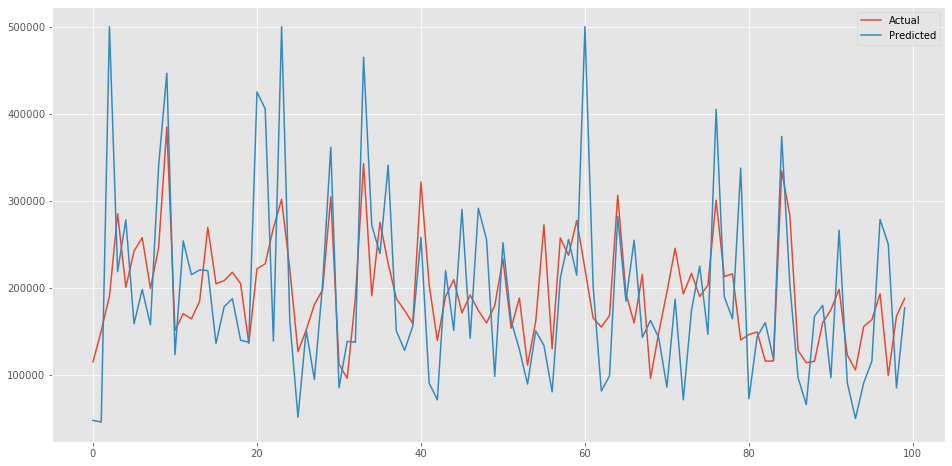

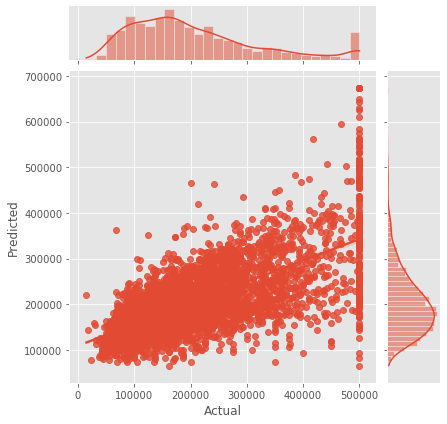

In [152]:
# Displaying the Actual and Prediction charts

test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [153]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

84209.01241414454


Text(0, 0.5, ' Predicted median_house_value')

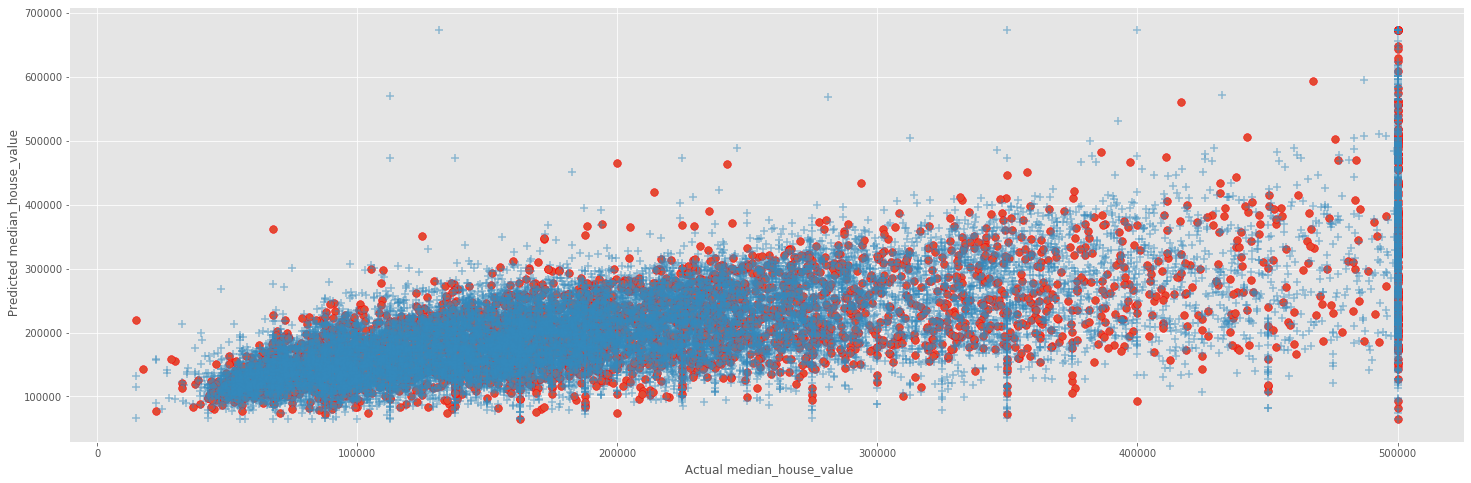

In [155]:
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test,y_pred,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train,linreg.predict(np.array(x_train).reshape(-1,1)),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")